In [1]:

"""
Connect senior:Mainland
"""
import pandas as pd
import json
import requests
def ssql(sql):
    admin_token = '2cebeb5c7edac5ef0d7c5a640e69fc7d43bf2cd6a24ce43dfee3dd33662c0bab'
    url = 'http://sensor.wb-intra.com/api/sql/query?token=%s&project=production' % admin_token
    data = {'q': sql, 'format': 'json'}
    req = requests.post(url,data)
    req_dec = req.content.decode()
    try:
        req_json = json.loads('[' + req_dec.replace('\n', ',')[:-1] + ']')
        df_d_id = pd.DataFrame(req_json)
        return df_d_id
    except:
        print(req_dec)

In [10]:
df = ssql("""
SELECT t0.game_level
FROM
  (SELECT distinct_id,
          game_level,
          time,
          row_number()over(partition BY distinct_id
                           ORDER BY time DESC) AS time_rank
   FROM events
   WHERE event = 'gameOver'
     AND gameTypeId = 1800
     AND date = current_date() - interval 1 day
   GROUP BY 1,
            2,
            3)t0
WHERE t0.time_rank = 1
""")

In [11]:
df

,game_level
0,9
1,3
2,12
3,12
4,6
...,...
216232,8
216233,7
216234,4
216235,2


In [5]:
df.groupby(['game_level']).value_count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_count'

In [12]:
import matplotlib.pyplot as plt

In [13]:
bin = len(df['game_level'].unique())

In [14]:
bin

32

(array([4.22618731e-02, 1.01551658e-01, 8.39365768e-02, 9.12929019e-02,
        9.10064778e-02, 8.75455202e-02, 8.32778014e-02, 7.74299764e-02,
        6.78872808e-02, 5.77526421e-02, 5.22437523e-02, 4.21854933e-02,
        3.48243944e-02, 2.73725946e-02, 2.12622142e-02, 1.71997660e-02,
        1.30609381e-02, 1.02062447e-02, 7.73822391e-03, 5.96716834e-03,
        4.56369035e-03, 3.38457788e-03, 2.56826925e-03, 1.72809195e-03,
        1.30800330e-03, 9.97710547e-04, 7.39928874e-04, 3.62803835e-04,
        3.05519019e-04, 1.43212040e-04, 1.05022163e-04, 4.77373467e-05]),
 array([ 1.     ,  1.96875,  2.9375 ,  3.90625,  4.875  ,  5.84375,
         6.8125 ,  7.78125,  8.75   ,  9.71875, 10.6875 , 11.65625,
        12.625  , 13.59375, 14.5625 , 15.53125, 16.5    , 17.46875,
        18.4375 , 19.40625, 20.375  , 21.34375, 22.3125 , 23.28125,
        24.25   , 25.21875, 26.1875 , 27.15625, 28.125  , 29.09375,
        30.0625 , 31.03125, 32.     ]),
 <BarContainer object of 32 artists>)

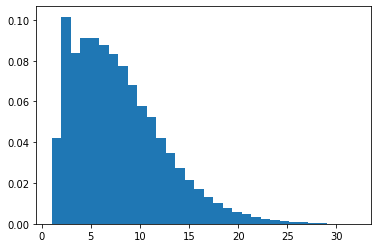

In [15]:
plt.hist(df.game_level,bins=int(bin),density=True)

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='game_level'>

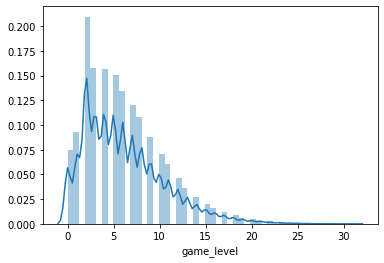

In [31]:
sns.distplot(df.game_level,kde=True)